In [16]:
import os
import pandas as pd

# Import task data
task_data = pd.read_csv(r"../../Data/onet_tasks.csv")

# Read employment data from all ISCO sheets into a dictionary
isco_sheets = ["ISCO1", "ISCO2", "ISCO3", "ISCO4", "ISCO5", "ISCO6", "ISCO7", "ISCO8", "ISCO9"]
isco_data = {sheet: pd.read_excel(r"../../Data/Eurostat_employment_isco.xlsx", sheet_name=sheet) for sheet in isco_sheets}

# Concatenate all ISCO data into a single DataFrame, aligning by country columns
merged_isco = pd.concat(isco_data.values(), axis=0)

# Calculate total workers per country by summing across rows for each country column
total_workers_by_country = merged_isco.groupby(merged_isco.index).sum()

# Focus on Belgium, Spain, and Poland, but can be generalized to any country in the dataset
countries_of_interest = ['Belgium', 'Spain', 'Poland']
total_workers = total_workers_by_country[countries_of_interest]

print(total_workers)

    Belgium    Spain   Poland
0    4391.5  18169.2  15027.1
1    4472.2  18373.4  15245.5
2    4428.3  18241.4  15353.6
3    4473.3  17896.2  15260.8
4    4426.3  17509.0  15055.5
5    4442.1  17500.8  15263.9
6    4458.5  17414.9  15368.6
7    4471.1  17094.4  15272.3
8    4430.4  16799.3  14935.2
9    4471.1  16932.9  15172.2
10   4493.7  17008.7  15374.1
11   4441.7  16916.6  15346.8
12   4436.3  16729.4  15205.5
13   4467.4  17128.6  15390.1
14   4473.1  17263.6  15638.9
15   4496.7  17338.3  15611.5
16   4477.9  17224.4  15415.1
17   4440.2  17633.8  15563.3
18   4490.8  17811.1  15801.4
19   4481.4  17841.3  15832.6
20   4458.4  17792.2  15568.6
21   4483.3  18055.6  15702.1
22   4503.1  18280.0  15784.0
23   4601.3  18251.6  15846.2
24   4498.3  18181.9  15771.3
25   4536.1  18552.9  15978.1
26   4578.9  18780.5  15970.1
27   4645.0  18722.5  15880.2
28   4633.4  18588.0  15816.4
29   4614.8  19047.8  16022.6
30   4715.5  19217.8  16030.7
31   4736.0  19251.5  15844.3
32   4683.

In [17]:
import pandas as pd
import numpy as np

# Add 'ISCO' column and concatenate all data
for i, df in isco_data.items():
    df['ISCO'] = i

all_data = pd.concat(isco_data.values(), ignore_index=True)

# Calculate total workers for each country dynamically
countries = [col for col in all_data.columns if col not in ['ISCO']]  # Identify country columns

# Sum totals for each country
for country in countries_of_interest:
    all_data[f'total_{country}'] = pd.concat([total_workers_by_country[country]]*9, ignore_index=True)

# Calculate occupation shares for each country
for country in countries_of_interest:
    all_data[f'share_{country}'] = all_data[country] / all_data[f'total_{country}']

all_data

,TIME,European Union - 28 countries (2013-2020),Belgium,Czechia,Denmark,Spain,Italy,Lithuania,Poland,Finland,Sweden,ISCO,total_Belgium,total_Spain,total_Poland,share_Belgium,share_Spain,share_Poland
0,2011-Q1,12850.9,279.0,223.5,57.6,879.8,896.0,120.0,963.5,137.2,232.6,ISCO1,4391.5,18169.2,15027.1,0.063532,0.048423,0.064117
1,2011-Q2,12834.2,304.7,226.2,58.2,911.6,897.0,118.9,918.4,135.8,236.0,ISCO1,4472.2,18373.4,15245.5,0.068132,0.049615,0.060241
2,2011-Q3,12763.1,348.8,227.3,107.5,881.4,840.1,107.0,913.8,123.5,238.5,ISCO1,4428.3,18241.4,15353.6,0.078766,0.048319,0.059517
3,2011-Q4,12668.1,347.9,230.3,74.1,888.2,764.9,107.8,935.9,106.6,246.1,ISCO1,4473.3,17896.2,15260.8,0.077773,0.049631,0.061327
4,2012-Q1,12197.3,304.0,231.1,50.6,848.8,762.2,107.5,952.5,102.5,249.8,ISCO1,4426.3,17509.0,15055.5,0.068680,0.048478,0.063266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2019-Q4,19822.2,492.1,323.9,301.2,2478.6,2552.2,116.2,922.4,154.2,217.4,ISCO9,4758.2,19639.3,15851.8,0.103421,0.126206,0.058189
356,2020-Q1,:,447.5,313.0,286.4,2434.4,2421.7,118.2,883.4,139.9,217.5,ISCO9,4741.1,19336.8,15827.5,0.094387,0.125895,0.055814
357,2020-Q2,:,426.9,303.9,268.5,2163.0,2328.3,110.8,885.6,143.4,210.3,ISCO9,4682.0,18270.0,15695.8,0.091179,0.118391,0.056423
358,2020-Q3,:,436.1,305.9,280.1,2252.1,2512.0,110.9,887.8,153.0,218.5,ISCO9,4741.1,18808.4,15863.2,0.091983,0.119739,0.055966


In [24]:
# Process task data: extract 1-digit ISCO code
task_data['isco08_1dig'] = task_data['isco08'].astype(str).str[:1].astype(int)
all_data['isco08_1dig'] = all_data['ISCO'].astype(str).str[-1].astype(int)

# Aggregate task data at the 1-digit level
aggdata = task_data.groupby('isco08_1dig').mean().drop(columns=['isco08'])

# Merge employment data with task data based on ISCO
combined = pd.merge(all_data, aggdata, on='isco08_1dig', how='left')

Index(['TIME', 'European Union - 28 countries (2013-2020)', 'Belgium',
       'Czechia', 'Denmark', 'Spain', 'Italy', 'Lithuania', 'Poland',
       'Finland', 'Sweden', 'ISCO', 'total_Belgium', 'total_Spain',
       'total_Poland', 'share_Belgium', 'share_Spain', 'share_Poland',
       'isco08_1dig', 't_1A1f1', 't_1A2a2', 't_2B1a', 't_4A2a4', 't_4A2b2',
       't_4A3a3', 't_4A3a4', 't_4A4a1', 't_4A4a4', 't_4A4b4', 't_4A4b5',
       't_4C2d1g', 't_4C2d1i', 't_4C3b4', 't_4C3b7', 't_4C3d3', 't_4C3b8_rev',
       't_4C1a2l_rev', 't_4A4a5_rev', 't_4A4a8_rev', 't_4A1b2_rev',
       't_4A3a2_rev', 't_4A3b4_rev', 't_4A3b5_rev'],
      dtype='object')

In [25]:
import numpy as np

# List of task items and countries
task_items = ["t_4A2a4", "t_4A2b2", "t_4A4a1"]
countries = ["Belgium", "Poland", "Spain"]

# Loop over task items and countries to calculate standardized values
for task in task_items:
    for country in countries:
        # Calculate the weighted mean and standard deviation for each task and country
        temp_mean = np.average(combined[task], weights=combined[f"share_{country}"])
        temp_sd = np.sqrt(np.average((combined[task] - temp_mean) ** 2, weights=combined[f"share_{country}"]))
        
        # Create new standardized column
        combined[f"std_{country}_{task}"] = (combined[task] - temp_mean) / temp_sd

# Inspect the standardized columns in the combined dataframe
print(combined[[f"std_{country}_{task}" for task in task_items for country in countries]].head())


   std_Belgium_t_4A2a4  std_Poland_t_4A2a4  std_Spain_t_4A2a4  \
0             1.283003            1.510081           1.639543   
1             1.283003            1.510081           1.639543   
2             1.283003            1.510081           1.639543   
3             1.283003            1.510081           1.639543   
4             1.283003            1.510081           1.639543   

   std_Belgium_t_4A2b2  std_Poland_t_4A2b2  std_Spain_t_4A2b2  \
0             0.941598            1.120186           1.227219   
1             0.941598            1.120186           1.227219   
2             0.941598            1.120186           1.227219   
3             0.941598            1.120186           1.227219   
4             0.941598            1.120186           1.227219   

   std_Belgium_t_4A4a1  std_Poland_t_4A4a1  std_Spain_t_4A4a1  
0             0.931835            1.148909           1.238556  
1             0.931835            1.148909           1.238556  
2             0.931835    

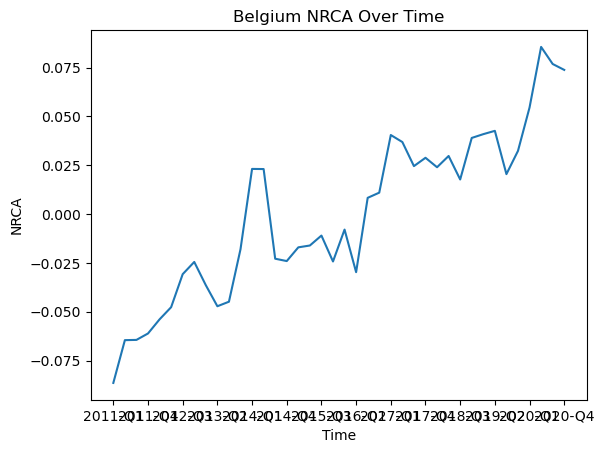

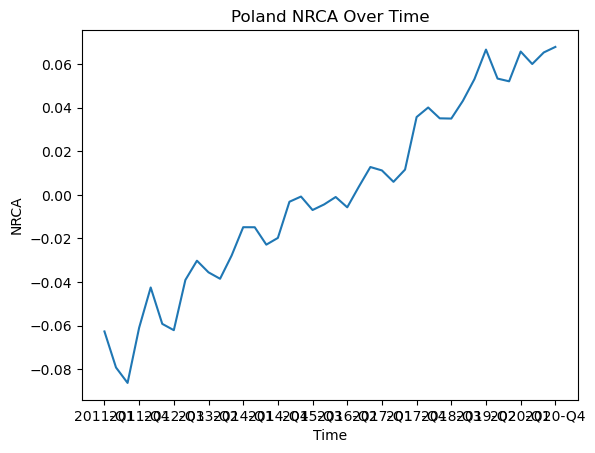

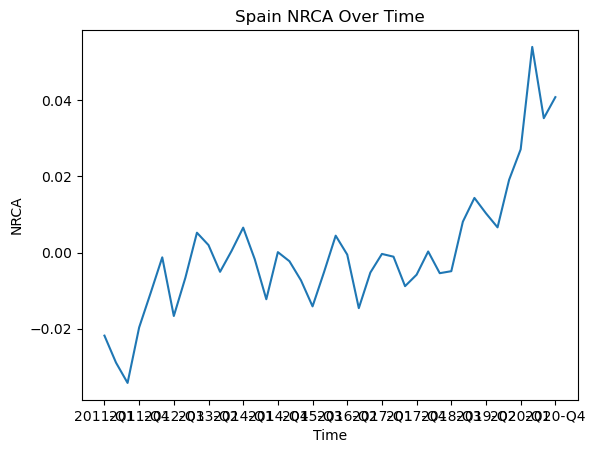

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define NRCA task columns and countries for easier iteration
nrca_tasks = ["t_4A2a4", "t_4A2b2", "t_4A4a1"]
countries = ["Belgium", "Poland", "Spain"]

# Step 1: Calculate NRCA (Non-Routine Cognitive Analytical) task content intensity for each country
for country in countries:
    combined[f"{country}_NRCA"] = combined[[f"std_{country}_{task}" for task in nrca_tasks]].sum(axis=1)
    
    # Step 2: Standardize NRCA for each country
    temp_mean = np.average(combined[f"{country}_NRCA"], weights=combined[f"share_{country}"])
    temp_sd = np.sqrt(np.average((combined[f"{country}_NRCA"] - temp_mean) ** 2, weights=combined[f"share_{country}"]))
    combined[f"std_{country}_NRCA"] = (combined[f"{country}_NRCA"] - temp_mean) / temp_sd
    
    # Step 3: Multiply by share of workers to get country-level task intensity
    combined[f"multip_{country}_NRCA"] = combined[f"std_{country}_NRCA"] * combined[f"share_{country}"]

# Step 4: Group by TIME and aggregate task intensity for each country
agg_data = {}
for country in countries:
    agg_data[country] = combined.groupby("TIME")[f"multip_{country}_NRCA"].sum().reset_index()

# Step 5: Plot NRCA trends over time for each country
for country in countries:
    plt.plot(agg_data[country]["TIME"], agg_data[country][f"multip_{country}_NRCA"], label=f"{country} NRCA")
    plt.xticks(range(0, len(agg_data[country]), 3), agg_data[country]["TIME"][::3])
    plt.title(f"{country} NRCA Over Time")
    plt.xlabel("Time")
    plt.ylabel("NRCA")
    plt.show()

# One can easily extend the above pattern to calculate other task categories, such as Routine Manual tasks.